In [ ]:
from src import Pipeline, PoolingEncoder, UpscaleDecoder, Classifier
from os.path import join
from torchvision import transforms

In [ ]:
ae_width = 24
save_dir = join("..", "finetuning_methodology", f"width_{ae_width}")

e_params = {
    "dense" : False,
    "width" : ae_width,
    "BN" : True,
    "conv_per_layer":2,
    "Dropout":0.2}

d_params = {
    "dense" : False,
    "width" : ae_width,
    "BN" : True,
    "conv_per_layer":2,
    "Dropout":0}

dense_params = {"width":ae_width * 64,
               "depth":0,
               "Dropout":0.2,
               "BN" : True}

pipeline_config = {
    "transform_train": transforms.Compose([transforms.RandomHorizontalFlip(),
                                   transforms.ColorJitter(brightness=0.1, contrast=0.1),
                                   transforms.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(1, 1)),
                                   transforms.ToTensor()]),
    "transform_test": transforms.Compose([transforms.ToTensor()]),
    "train_bs": 64,
    "test_bs": 512,
    "lr": 1e-4,
    "train_prop":{"bird":0.5, "deer":0.5, "truck":0.5},
    "noise" : 0.2,
    "masking" : 0,
    "l1_pen" : 0
    }

## Preliminary Auto-encoder training

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "decoder"], task="ae", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=50, save_dir=join(save_dir, "pretrained_ae"), save_nets=["encoder", "decoder"])


encoder net: activated
decoder net: activated
classifier net: deactivated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 1.811e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.281e-02 | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 1.101e-02 | lr: 1.000e-04
Validation:
Autoencoder loss: 1.083e-02 | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 9.344e-03 | lr: 1.000e-04
Validation:
Autoencoder loss: 9.646e-03 | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 8.354e-03 | lr: 1.000e-04
Validation:
Autoencoder loss: 9.044e-03 | lr: 1.000e-04

Epoch #5
Train:
Autoencoder loss: 7.749e-03 | lr: 1.000e-04
Validation:
Autoencoder loss: 8.602e-03 | lr: 1.000e-04

Epoch #6
Train:
Autoencoder loss: 7.346e-03 | lr: 1.000e-04
Validation:
Autoencoder loss: 8.600e-03 | lr: 1.000e-04

Epoch #7
Train:
Autoencoder loss: 6.998e-03 | lr: 1.000e-04
Validation:
Autoencoder lo

## Methodology 1: Train Classifier with frozen Encoder

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))

pipeline.set_mode(active=["classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_1"), save_nets=["classifier"])


encoder net: deactivated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 2.010e-02 | Accuracy: 34.50%, (13787/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.850e-02 | Accuracy: 39.54%, (3970/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.785e-02 | Accuracy: 40.90%, (16345/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.727e-02 | Accuracy: 42.87%, (4304/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.704e-02 | Accuracy: 42.95%, (17162/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.665e-02 | Accuracy: 45.06%, (4524/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.656e-02 | Accuracy: 44.29%, (17697/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.628e-02 | Accuracy: 45.97%, (4615/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.624e-02 | Accuracy: 45.34

## Methodology 2: Train Classifier and Encoder (without pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_2"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 1.997e-02 | Accuracy: 28.18%, (11262/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.668e-02 | Accuracy: 40.26%, (4042/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.696e-02 | Accuracy: 38.55%, (15403/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.499e-02 | Accuracy: 45.72%, (4590/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.561e-02 | Accuracy: 43.63%, (17435/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.394e-02 | Accuracy: 49.41%, (4961/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.460e-02 | Accuracy: 47.12%, (18830/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.318e-02 | Accuracy: 52.76%, (5297/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.392e-02 | Accuracy: 50.22

## Methodology 3: Train Classifier and Encoder (with pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_3"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 1.580e-02 | Accuracy: 44.91%, (17947/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.250e-02 | Accuracy: 55.97%, (5619/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.155e-02 | Accuracy: 59.54%, (23791/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.009e-02 | Accuracy: 63.75%, (6400/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 9.852e-03 | Accuracy: 66.14%, (26430/39960) | lr: 1.000e-04
Validation:
Classifier loss: 8.796e-03 | Accuracy: 68.54%, (6881/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 8.786e-03 | Accuracy: 69.53%, (27784/39960) | lr: 1.000e-04
Validation:
Classifier loss: 8.215e-03 | Accuracy: 71.21%, (7149/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 8.188e-03 | Accuracy: 71.85%,

## Methodology 4: Train Classifier, Encoder and Decoder on a combined task (without pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "decoder", "classifier"], task="both", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_4"), save_nets=["encoder", "decoder", "classifier"])


encoder net: activated
decoder net: activated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 2.014e-02 | Classifier loss: 1.942e-02 | Accuracy: 30.37%, (12136/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.405e-02 | Classifier loss: 1.591e-02 | Accuracy: 43.37%, (4354/10040) | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 1.256e-02 | Classifier loss: 1.621e-02 | Accuracy: 41.59%, (16620/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.178e-02 | Classifier loss: 1.442e-02 | Accuracy: 48.14%, (4833/10040) | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 1.091e-02 | Classifier loss: 1.506e-02 | Accuracy: 45.66%, (18245/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 1.057e-02 | Classifier loss: 1.370e-02 | Accuracy: 51.22%, (5142/10040) | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 9.982e-03 | Classifier loss: 1

## Methodology 5: Train Classifier, Encoder and Decoder on a combined task (with pre-training)

In [0]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)
pipeline.load_net("encoder", join(save_dir, "pretrained_ae", "encoder.pth"))
pipeline.load_net("decoder", join(save_dir, "pretrained_ae", "decoder.pth"))

pipeline.set_mode(active=["encoder", "decoder", "classifier"], task="both", corrupt=True, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_5"), save_nets=["encoder", "decoder", "classifier"])


encoder net: activated
decoder net: activated
classifier net: activated
masking ratio: 0
noise magnitude: 0.2
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Autoencoder loss: 6.224e-03 | Classifier loss: 1.744e-02 | Accuracy: 40.06%, (16009/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 7.417e-03 | Classifier loss: 1.478e-02 | Accuracy: 48.43%, (4862/10040) | lr: 1.000e-04

Epoch #2
Train:
Autoencoder loss: 6.366e-03 | Classifier loss: 1.430e-02 | Accuracy: 49.36%, (19724/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 7.466e-03 | Classifier loss: 1.324e-02 | Accuracy: 53.42%, (5363/10040) | lr: 1.000e-04

Epoch #3
Train:
Autoencoder loss: 6.434e-03 | Classifier loss: 1.321e-02 | Accuracy: 53.23%, (21271/39960) | lr: 1.000e-04
Validation:
Autoencoder loss: 7.847e-03 | Classifier loss: 1.224e-02 | Accuracy: 56.94%, (5717/10040) | lr: 1.000e-04

Epoch #4
Train:
Autoencoder loss: 6.432e-03 | Classifier loss: 1

## Methodology 6 : Reference classifier

In [3]:
encoder = PoolingEncoder(e_params)
decoder = UpscaleDecoder(d_params)
classifier = Classifier(dense_params)

pipeline = Pipeline(pipeline_config, encoder=encoder, decoder=decoder, classifier=classifier)

pipeline.set_mode(active=["encoder", "classifier"], task="classification", corrupt=False, has_valset=True)
pipeline.fit(n_epochs=100, save_dir=join(save_dir, "methodology_6"), save_nets=["encoder", "classifier"])


encoder net: activated
decoder net: deactivated
classifier net: activated
masking ratio: 0
noise magnitude: 0
==> Preparing data...
Files already downloaded and verified
Files already downloaded and verified

Epoch #1
Train:
Classifier loss: 1.782e-02 | Accuracy: 36.16%, (14451/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.447e-02 | Accuracy: 48.27%, (4846/10040) | lr: 1.000e-04

Epoch #2
Train:
Classifier loss: 1.497e-02 | Accuracy: 46.39%, (18537/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.297e-02 | Accuracy: 53.21%, (5342/10040) | lr: 1.000e-04

Epoch #3
Train:
Classifier loss: 1.362e-02 | Accuracy: 51.34%, (20515/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.197e-02 | Accuracy: 57.37%, (5760/10040) | lr: 1.000e-04

Epoch #4
Train:
Classifier loss: 1.258e-02 | Accuracy: 54.97%, (21967/39960) | lr: 1.000e-04
Validation:
Classifier loss: 1.129e-02 | Accuracy: 59.53%, (5977/10040) | lr: 1.000e-04

Epoch #5
Train:
Classifier loss: 1.168e-02 | Accuracy: 58.64%,

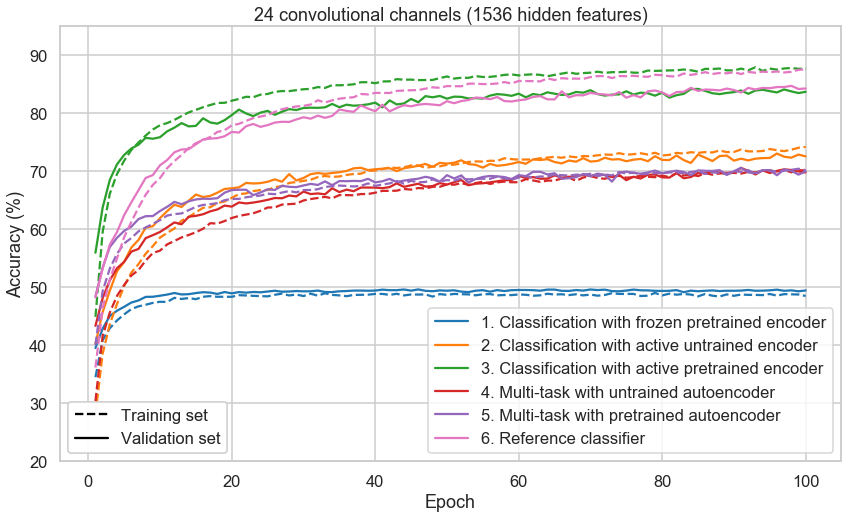

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D

sns.set_style("whitegrid")
sns.set_context("talk")
colors = ("tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:pink")

custom_lines = [Line2D([0], [0], color = c) for c in colors]
custom_lines.append(Line2D([0], [0], ls="--", color = "black"))
custom_lines.append(Line2D([0], [0], color = "black"))


stats = []
train_accuracies = []
val_accuracies = []
for i in range(1, 7):
    stats.append(pd.read_csv(join(save_dir, f"methodology_{i}", "train_history.csv")))
    train_accuracies.append((stats[i-1]["train_correct"] / stats[i-1]["train_total"]).values*100)
    val_accuracies.append((stats[i-1]["val_correct"] / stats[i-1]["val_total"]).values*100)

fig, ax = plt.subplots(1, 1, figsize = (14, 8))

for i in range(6):
    ax.plot(range(1, 101), train_accuracies[i], '--', c = colors[i])
    ax.plot(range(1, 101), val_accuracies[i], c = colors[i])

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

legend = plt.legend(custom_lines, [
    "1. Classification with frozen pretrained encoder",
    "2. Classification with active untrained encoder",
    "3. Classification with active pretrained encoder",
    "4. Multi-task with untrained autoencoder",
    "5. Multi-task with pretrained autoencoder",
    "6. Reference classifier",
], loc=4)

legend1 = plt.legend(custom_lines[6:], [
    "Training set",
    "Validation set"
], loc=3)

plt.ylim([20, 95])
plt.title("24 convolutional channels (1536 hidden features)")

plt.gca().add_artist(legend)
plt.gca().add_artist(legend1)